### import libraries

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt
import calendar 
%matplotlib inline

**Data Loading, Exploration & Wrangling**

In [3]:
df = pd.read_csv("Data sets/Unemployment in india.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Task** <Br>
Analyze trends in unemployment across Indian states over time, focusing on monthly data. Investigate factors affecting unemployment rates and explore variations in labor participation and employment levels. Provide insights into the impact of these trends on the Indian job market.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.tail(30)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
738,Uttarakhand,31-05-2020,Monthly,17.36,778590.0,32.27,Urban
739,Uttarakhand,30-06-2020,Monthly,5.08,989470.0,35.61,Urban
740,West Bengal,31-05-2019,Monthly,7.25,11306177.0,46.37,Urban
741,West Bengal,30-06-2019,Monthly,7.38,10611498.0,43.51,Urban
742,West Bengal,31-07-2019,Monthly,7.91,10779829.0,44.38,Urban
743,West Bengal,31-08-2019,Monthly,7.27,11456493.0,46.77,Urban
744,West Bengal,30-09-2019,Monthly,7.79,11158649.0,45.74,Urban
745,West Bengal,31-10-2019,Monthly,7.83,10563686.0,43.25,Urban
746,West Bengal,30-11-2019,Monthly,6.61,10768462.0,43.44,Urban
747,West Bengal,31-12-2019,Monthly,7.24,11335696.0,45.97,Urban


- Removing NaN using iloc function 

In [6]:
df = df.drop(df.iloc[754:].index)


In [7]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
# Renaming the columns for easier access

df = df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp'] = round((df['Est_Emp']/1000000),2)

df.head(2)

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural


In [9]:
df.isnull().sum()

States             14
Date               14
Frequency          14
Est_Unemp_Rate     14
Est_Emp            14
Est_Labour_Rate    14
Area               14
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(740, 7)

In [13]:
# Changing type of column Date to time.date 
df['Date'] = pd.to_datetime(df['Date'])

# changing datatype of area to categorical 
df['Area'] = df['Area'].astype('category')

#drop frequency column 

df = df.drop(columns="Frequency" , axis=1)

In [16]:
# create new columns for year and month
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

# Mapping integer to abbreviated month names
df['Month Name'] = df['Month'].apply(lambda x : calendar.month_abbr[x])

df.head()

,States,Date,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area,Year,Month,Month Name
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5,May
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6,Jun
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7,Jul
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8,Aug
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9,Sep


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   States           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Est_Unemp_Rate   740 non-null    float64       
 3   Est_Emp          740 non-null    float64       
 4   Est_Labour_Rate  740 non-null    float64       
 5   Area             740 non-null    category      
 6   Year             740 non-null    int64         
 7   Month            740 non-null    int64         
 8   Month Name       740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 52.9+ KB


**EDA & VISUALIZTION**

In [21]:
# the Discriptive Statistics

df_stats = df[['Est_Unemp_Rate','Est_Emp','Est_Labour_Rate']]

round(df_stats.describe() , 2)


,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate
count,740.00,740.00,740.00
mean,11.79,7.20,42.63
std,10.72,8.09,8.11
min,0.00,0.05,13.33
25%,4.66,1.19,38.06
50%,8.35,4.74,41.16
75%,15.89,11.28,45.50
max,76.74,45.78,72.57


In [36]:
# Grouping data by 'Date' and calculate mean of Unemployment rate for each daate

mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create line plot

fig1 = px.line(df , x=mean_unemployment_over_time.index, y=mean_unemployment_over_time.values ,markers=True , title='Unemployment Rate Over Time')
#fig.update_traces(textposition="bottom right")
fig1.show()

- The plot reveals periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020

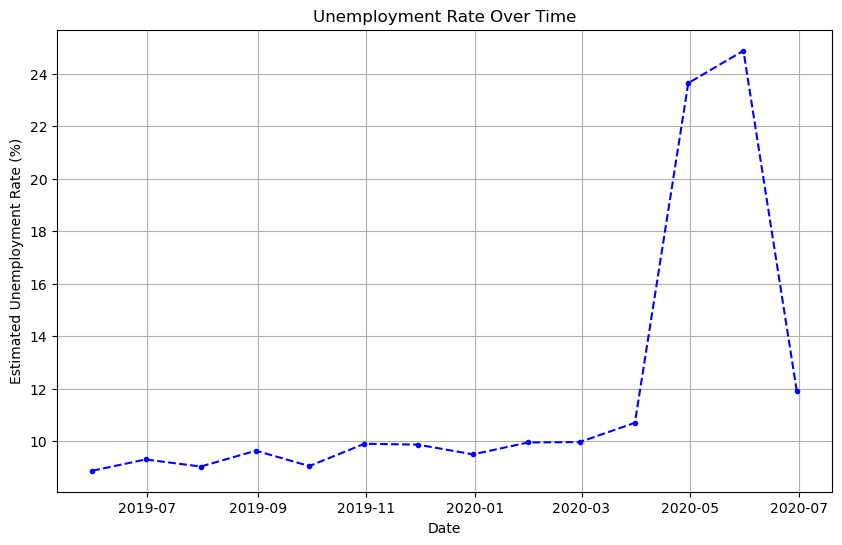

In [35]:
# in other way
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='.', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

- Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020

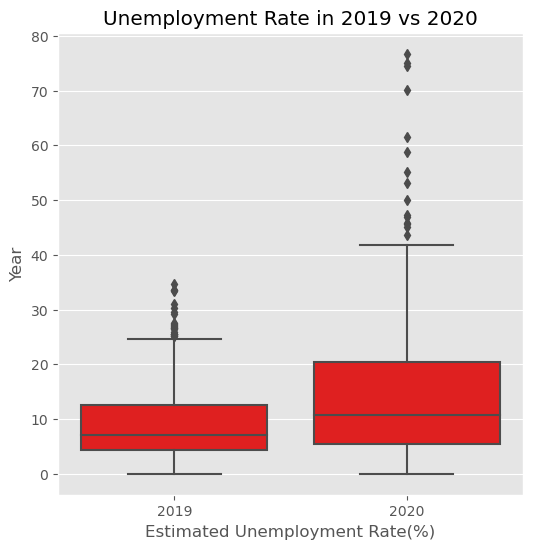

In [45]:
# Analyzing the 'Estimated Unemployment Rate' column using boxplot between 2019 & 2020

plt.figure(figsize=(6,6))
plt.style.use('ggplot')

sns.boxplot(x=df['Year'] , y=df['Est_Unemp_Rate'] , color='red')

plt.xlabel('Estimated Unemployment Rate(%)')
plt.ylabel('Year')
plt.title('Unemployment Rate in 2019 vs 2020')
plt.show()

Overall unemployment rate was high for :-

   - Tripura
   - Haryana
   - Jharkhand
   - Bihar

Overall Lowest unemployment rate was for :-

- Meghalaya
- Odisha
- Assam
- Utarakhand

In [48]:
# Bar plot of average of Unemployment rate by states

df_unemp = df[['Est_Unemp_Rate' , 'States']].groupby('States').mean().reset_index().sort_values('Est_Unemp_Rate')

fig2 = px.bar(df_unemp , x='States' , y='Est_Unemp_Rate' , color='States',
              labels={'States':'States',
                      'Est_Unemp_Rate':'Average Unemployment Rate (%)'},
                      title="Average Unemployment Rate for each State")
fig2.show()

In [49]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [50]:
# Sunburst chart showing unemployment rate in each area and state

fig = px.sunburst(df, path=['Area', 'States'], values='Est_Unemp_Rate',
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Area',
                  height=650, template='ggplot2')
fig.show()

In [51]:
# Bar plot of average Labour Rate by States

df_lr = df[['Est_Labour_Rate', 'States']].groupby('States').mean().reset_index()
df_lr = df_lr.sort_values('Est_Labour_Rate')
fig = px.bar(df_lr, x='States', y='Est_Labour_Rate', color='States',
             labels={'States' : 'States', 'Est_Labour_Rate' : 'Labour Rate (%)'},
             title='Average Labour Rate in each States', template='gridon')
fig.show()

In [52]:
# Analysing the Area column

df.Area.value_counts(normalize = True)*100

Urban    51.486486
Rural    48.513514
Name: Area, dtype: float64

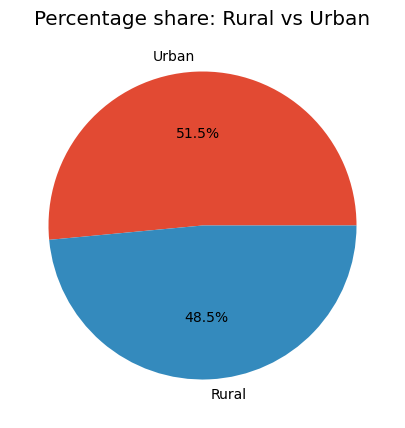

In [53]:
# Pie chart for Rural and Urban count

plt.figure(figsize=[6, 5])
plt.pie(df['Area'].value_counts(), labels=df['Area'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

In [54]:
# Descriptive Statistics based on Area

area_stats = df.groupby(['Area'])[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(area_stats.describe(),2).T

Area                    Rural   Urban
Est_Unemp_Rate  count  359.00  381.00
                mean    10.32   13.17
                std     10.04   11.17
                min      0.00    0.00
                25%      3.79    5.82
                50%      6.76    9.97
                75%     13.76   18.04
                max     74.51   76.74
Est_Emp         count  359.00  381.00
                mean    10.19    4.39
                std      9.85    4.41
                min      0.05    0.06
                25%      2.02    0.78
                50%      7.51    2.82
                75%     14.76    5.76
                max     45.78   17.49
Est_Labour_Rate count  359.00  381.00
                mean    44.46   40.90
                std      8.85    6.92
                min     13.33   20.51
                25%     39.05   37.42
                50%     42.56   40.21
                75%     48.15   44.18
                max     72.57   72.26

In [55]:
# Average Unemployment Rate in each Area

df_ar_unemp = df[['Est_Unemp_Rate', 'Area']].groupby('Area').mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values('Est_Unemp_Rate')
fig = px.bar(df_ar_unemp, x='Area', y='Est_Unemp_Rate', color='Area',
             labels={'Area' : 'Area', 'Est_Unemp_Rate' : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Area', template='gridon')
fig.show()


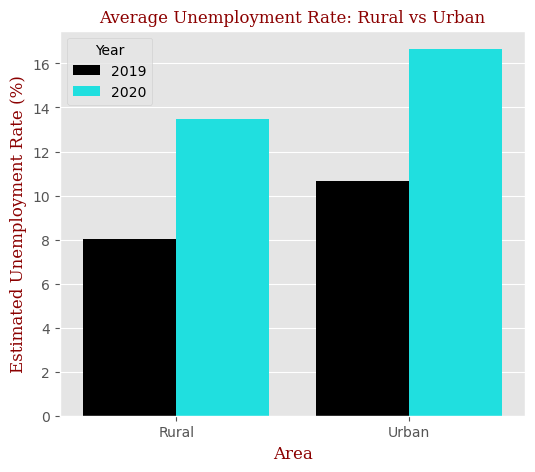

In [56]:
# Mean Unemploymnet rate in each area for 2019 vs 2020

plt.figure(figsize = [6,5])
palette ={2019: "black", 2020: "cyan"}
sns.barplot(data = df, x = 'Area', y="Est_Unemp_Rate", estimator='mean', hue='Year', errorbar=None, palette=palette)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
plt.xlabel('Area', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Rural vs Urban', fontdict=font)
plt.show()

In [57]:
# Creating new dataframes for before and after lockdown period during the same months

before_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2019)]
after_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2020)]

# Calculating the mean unemployment rate before lockdown by state

bf_lockdown= before_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state

af_lockdown = after_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state

combined_df = pd.merge(bf_lockdown, af_lockdown, on='States')

combined_df.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
combined_df.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,15.778333
1,Assam,6.7825,6.388000
2,Bihar,13.1650,36.988333
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,14.846667


In [58]:
# Percentage change in unemployment rate

combined_df['Rate Change in Unemployment'] = round(combined_df['Unemployment Rate After Lockdown'] - combined_df['Unemployment Rate Before Lockdown']/combined_df['Unemployment Rate Before Lockdown'],2)
percent_change_df = combined_df.sort_values('Rate Change in Unemployment')

# Percentage change in unemployment after lockdown

fig = px.bar(percent_change_df, x='States',y='Rate Change in Unemployment',color='Rate Change in Unemployment',
            labels={'States' : 'States', 'Rate Change in Unemployment' : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()